In [11]:
import pandas as pd
%pylab inline

data = pd.read_csv("chessData.csv")
#read in the chess Data that I had saved locally!

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
winnerArray = data['winner'].to_numpy()

In [13]:
whiteRating = data['white_rating'].to_numpy()
blackRating = data['black_rating'].to_numpy()


In [14]:
print(winnerArray.size)
print(whiteRating.size)
print(blackRating.size)

20058
20058
20058


In [15]:
listRatingsResult = []

for i in range(winnerArray.size):
    listRatingsResult.append([whiteRating[i], blackRating[i], winnerArray[i]])
df = pd.DataFrame(listRatingsResult)
                

In [16]:
df.columns=['White Rating', 'Black Rating', 'Result']
df

,White Rating,Black Rating,Result
0,1500,1191,white
1,1322,1261,black
2,1496,1500,white
3,1439,1454,white
4,1523,1469,white
5,1250,1002,draw
6,1520,1423,white
7,1413,2108,black
8,1439,1392,black
9,1381,1209,white


In [17]:
#let white or black winner correspond to a 1 and a tie correspond to a 0
ratingsDiff=[]
resultArr=[]
for i in range(df['White Rating'].size):
    diff = df['White Rating'][i]-df['Black Rating'][i]
    if diff < 0:
        diff = diff * -1
    ratingsDiff.append(diff)
    if df['Result'][i] == 'white':
        resultArr.append(1)
    elif df['Result'][i] == 'black':
        resultArr.append(1)
    else:
        resultArr.append(0)

In [18]:
DifferenceAndResult = pd.DataFrame(list(zip(ratingsDiff, resultArr)), columns=['Abs Val of Diff in Ratings', 'Result of Game'])

In [19]:
# Difference and Result dataframe consists of two series in which the first is the abs val of the diff in ratings and the second is the result of the game. A 1 indicates that there was an outright winner. A 0 indicates a draw. 

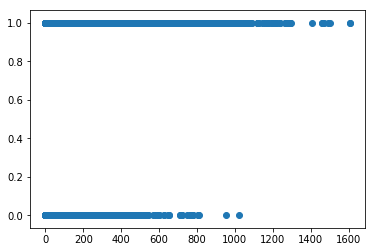

In [20]:
scatter(DifferenceAndResult['Abs Val of Diff in Ratings'], DifferenceAndResult['Result of Game'])

In [ ]:
# above plot: difference in ratings (abs val) on x-axis and y-axis is binary in that a 0 is draw and a 1 is a winner

In [ ]:
#let's try to predict what the victory status will be based on number of turns and abs val of difference in ratings
# let 0 be a draw, 1 a checkmate, 2 resign, and 3 out of time
# we have already calculate the abs val of ratings difference 
data['victory_status']

In [ ]:
vicStat = []
for i in range(data['victory_status'].size):
    if data['victory_status'][i] == "draw":
        vicStat.append(0)
    elif data['victory_status'][i] == "mate":
        vicStat.append(1)
    elif data['victory_status'][i] == "resign":
        vicStat.append(2)
    else:
        vicStat.append(3)

In [ ]:
%pylab inline

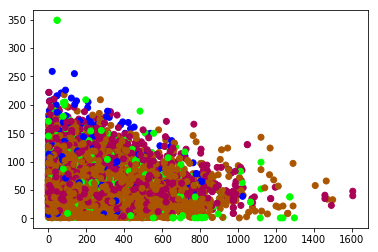

In [129]:
plt.scatter(ratingsDiff, data['turns'], c=vicStat,cmap=cm.brg) # plots ratings diff vs number of turns and points are colored by game status

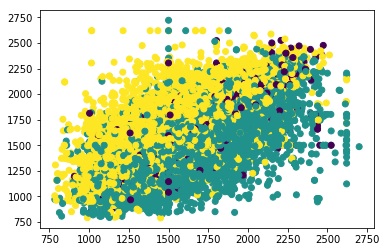

In [130]:
#tie = 0; white win = 1; black win = 2
winnerArray = []
for i in range(data['white_rating'].size):
    if data['winner'][i] == 'draw':
        winnerArray.append(0)
    elif data['winner'][i] == 'white':
        winnerArray.append(1)
    else:
        winnerArray.append(2)
plt.scatter(data['white_rating'], data['black_rating'], c=winnerArray)
    # 2d scatter plot of ratings between players colored by who won

In [ ]:
data

In [ ]:
moves=data['moves']

In [97]:
WhiteMoves = []
BlackMoves = []
wm = []
bm = []
for i in range(moves.size):
    string = moves[i]
    listMoves = string.split()
    del wm[:]
    del bm[:]
    for i in range(len(listMoves)):
        if i % 2 == 0:
            wm.append(listMoves[i])
        else:
            bm.append(listMoves[i])
    WhiteMoves.append(wm[:])
    BlackMoves.append(bm[:])
WhiteMoves
MovesDataFrame = pd.DataFrame(list(zip(WhiteMoves, BlackMoves)), columns=['White Moves', 'Black Moves'])

In [93]:
#The MovesDataFrame is a pandas dataframe in which each row correspond to the moves in that specific game with each column
# representing the moves of the player with white pieces and the moves of the players with black pieces

In [117]:
riskyMove = []
for i in range(MovesDataFrame['White Moves'].size):
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    found = 0
    white = 0
    black = 0
    while (it < len(whitemoves)) and (found==0):
           if whitemoves[it][0].isupper() == 1:
               found = 1
               white = 1
               break
           elif it < len(blackmoves):
               if blackmoves[it][0].isupper()==1:
                   found = 1
                   black = 1
                   break
           else:
               break
           it = it + 1
    if found == 0:
           riskyMove.append(-1)
    elif black == 1:
           riskyMove.append(2*(it+1))
    else:
           riskyMove.append((2*(it+1))-1)
    
riskyMove

[9,
 2,
 5,
 3,
 3,
 3,
 5,
 2,
 3,
 4,
 5,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 5,
 3,
 3,
 3,
 7,
 4,
 5,
 3,
 3,
 7,
 3,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 5,
 3,
 5,
 3,
 -1,
 3,
 3,
 4,
 4,
 5,
 4,
 5,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 2,
 8,
 3,
 7,
 3,
 2,
 3,
 3,
 7,
 3,
 2,
 2,
 6,
 3,
 3,
 5,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 4,
 4,
 5,
 3,
 8,
 3,
 2,
 3,
 5,
 5,
 6,
 8,
 4,
 6,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 4,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 6,
 6,
 3,
 6,
 6,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 7,
 2,
 2,
 2,
 5,
 4,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 6,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 5,
 3,
 5,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 6,
 3,
 3,
 4,
 3,
 3,
 3,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 4,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 7,
 1,
 3,
 3,
 3,
 3,
 3,

In [120]:
#riskyMove is an array that contains the ith move such that the ith move is the first in which a "risky"
# piece is moved. Let the ith number in the array be x. Then, for the ith game, the first risky piece that is moved occurs 
# during move x. A risky piece any of the pieces other than the pawns. 

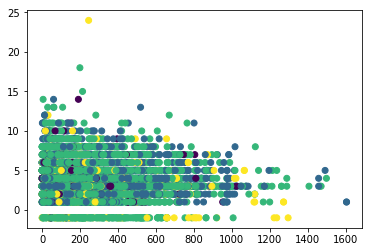

In [126]:
plt.scatter(ratingsDiff, riskyMove, c=vicStat)

In [127]:
# The above plot has the absolute value of the difference in player ratings on the x axis. The y axis correspond to the number of the first move
# in which a piece other than a pawn is moved. The points are colored by the vicStat array which is representative of either resign,outoftime, checkmate, draw